In [3]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from LoadMultiFiles import LoadOneFileUproot, LoadMultiROOTFiles

from copy import copy

path_e = "/afs/ihep.ac.cn/users/l/luoxj/PSD_LoweE/e-/PSD/root_predict/root/*.root"
path_alpha = "/afs/ihep.ac.cn/users/l/luoxj/PSD_LoweE/alpha/PSD/root_predict/root/*.root"
dir_path = {"alpha":path_alpha, "e-":path_e}
dir_PSD_diff_particle = {}
dir_evt_diff_particle = {}
for key,path in dir_path.items():
    dir_PSD_diff_particle[key] = copy(LoadMultiROOTFiles(path, name_branch="PSDTools"))
    dir_evt_diff_particle[key] = copy(LoadMultiROOTFiles(path, name_branch="PSDUser"))
    print("PSD:\t", dir_PSD_diff_particle[key].keys())
    print("evt:\t", dir_evt_diff_particle[key].keys())
# path_e = "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/PSD_LowE/e-/PSD/root/PSD-2.root"
# dir_PSD = LoadOneFileUproot(path_e, name_branch="PSDTools",return_list=False)
# dir_evt = LoadOneFileUproot(path_e, name_branch="PSDUser", return_list=False)



PSD:	 dict_keys(['psdVal', 'evtType'])
evt:	 dict_keys(['evtID', 'recE', 'recX', 'recY', 'recZ'])
PSD:	 dict_keys(['psdVal', 'evtType'])
evt:	 dict_keys(['evtID', 'recE', 'recX', 'recY', 'recZ'])


Text(0.5, 1.0, 'E<1.5 MeV & R3<4096 $m^3$')

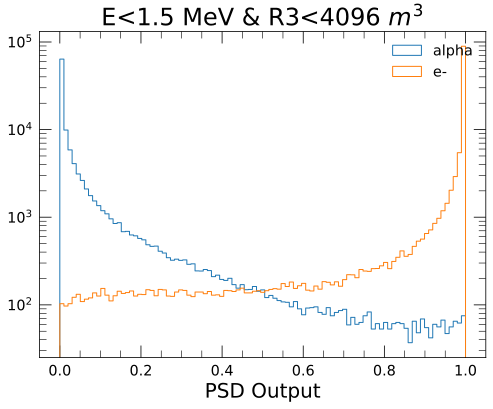

In [6]:
# print((dir_evt["recX"]**2+dir_evt["recY"]**2+dir_evt["recZ"]**2)**1.5)
E_cut = 1.5
R3_cut = 4096
dir_hist_PSD = {}
bins = np.linspace(0,1,100)
for key in dir_path.keys():
    dir_PSD = dir_PSD_diff_particle[key]
    dir_evt = dir_evt_diff_particle[key]
    dir_hist_PSD[key] = plt.hist(dir_PSD["psdVal"][(dir_evt["recE"]>0)&(dir_evt["recE"]<E_cut) & (((dir_evt["recX"]**2+dir_evt["recY"]**2+dir_evt["recZ"]**2)/1e6)**1.5<R3_cut)],bins=bins,
             histtype="step", label=key)
plt.semilogy()
plt.legend()
plt.xlabel("PSD Output")
plt.title(f"E<{E_cut} MeV & R3<{R3_cut} "+"$m^3$")

No handles with labels found to put in legend.


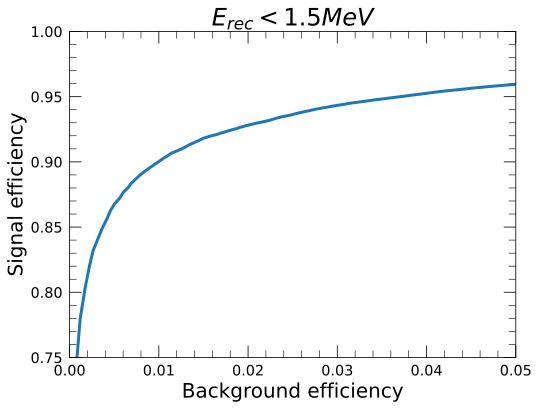

In [14]:
# Get Roc curve
n0 = dir_hist_PSD["alpha"][0]
n1 = dir_hist_PSD["e-"][0]
eff_bkg = []
eff_sig = []
for i in range(len(n0)):
    eff_bkg.append(np.sum(n0[i:]) * 1.0 / np.sum(n0))
    eff_sig.append(np.sum(n1[i:]) * 1.0 / np.sum(n1))

fig2 = plt.figure("Sig eff. VS Bkg eff.")
ax2=fig2.add_subplot(111)
ax2.plot(eff_bkg, eff_sig)
# (certain_eff_bkg, eff_sig_return) = self.InterpolateToGetSigEff(v_eff_bkg=eff_bkg, v_eff_sig=eff_sig)
# ax2.scatter(certain_eff_bkg, eff_sig_return, s=20, marker=(5, 1), label=self.strategy)
# print(f"background eff. : {certain_eff_bkg} ---> signal eff. : {eff_sig_return} +- {self.GetEfficiencySigma(eff_sig_return)}")
ax2.set_xlabel('Background efficiency')
ax2.set_ylabel('Signal efficiency')
ax2.set_title("$E_{rec}<  1.5 MeV$")
ax2.set_xlim(0, 0.05)
ax2.set_ylim(0.75, 1)
plt.legend()